Erlinda Barja Coragua
carrera: Ingenieria en sistema
Aprevdizaje Supervisado Clasificasion
Tafico veicular:
este modelo consite en clasificar atrabes de imagenes que de tomaron si pertenesen a una de las tres clase , que son  la de Sin trafico, Con trafico y Fuido  , quede decir si las avenidas o calles tiene una de esas caracteristicas
para ello como se menciono se uso un modelo de  con redes neuronales  de  Clasificasion para entrenar un modelo que realice ese trabajo de Clasificasion.

primro  se genero un dataset  en base a imagenes tomadas y se les puso en escala de grises y se les prosedio a etiquetar segun ala carpeta que estan las imagenes por que previamente se separo por carpetas  las imagenes  identificando donde perteneses 


In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Ruta principal donde están las imágenes
ruta_principal = 'E:/IA/fotos'

# Listas para almacenar datos
imagenes_data, etiquetas, nombres_archivos = [], [], []

# Iterar sobre imágenes en directorios y subdirectorios
for root, _, files in os.walk(ruta_principal):
    for archivo in files:
        if archivo.endswith('.jpg'):
            ruta_archivo = os.path.join(root, archivo)
            try:
                img = Image.open(ruta_archivo)# Abrir la imagen
                img = img.convert('L') # Convertir la imagen a escala de grises
                img_array = np.array(img).flatten()# Convertir la imagen a un array de numpy y aplanar
                imagenes_data.append(img_array)# Añadir el array al dataset  
                etiqueta = os.path.basename(root)  # Obtiene el nombre de la carpeta# Añadir la etiqueta (nombre de la carpeta)
                etiquetas.append(etiqueta)
            except Exception as e:
                print(f'Error al abrir {ruta_archivo}: {e}')
                continue

df = pd.DataFrame(imagenes_data)# Crear DataFrame con datos
df.insert(0, 'Etiqueta', etiquetas)  # Insertar la columna 'Etiqueta' al inicio
# Eliminar la columna 'Archivo' antes de guardar
df = df.drop('Archivo', axis=1, errors='ignore')  # Ignorar si la columna 'Archivo' no existe
# Mezclar filas
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Guardar el DataFrame como CSV
df.to_csv('dataset_trafico.csv', index=False)
print("Dataset guardado exitosamente.")
# Separar características y etiquetas
X_final = df.drop('Etiqueta', axis=1)  # Características
y_final = df['Etiqueta']  # Etiquetas


Dataset guardado exitosamente.


In [ ]:
#La función softmax calcula probabilidades normalizadas
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

In [ ]:
# aplica softmax + cross entropy de manera estable
#crossentropy calcula la pérdida comparando las predicciones con las etiquetas reales
def crossentropy(output, target):
    logits = output[np.arange(len(output)),target]
    entropy = - logits + np.log(np.sum(np.exp(output),axis=-1))
    return entropy
#grad_crossentropy calcula el gradiente como la diferencia entre las probabilidades softmax y las etiquetas reales normalizada
def grad_crossentropy(output, target):
    answers = np.zeros_like(output)
    answers[np.arange(len(output)),target] = 1    
    return (- answers + softmax(output)) / output.shape[0]

In [ ]:
#Se crea una clase Perceptron para implementar un modelo lineal que utiliza descenso por gradiente para entrenarse 
class Perceptron():
  def __init__(self, inputs, outputs):
    self.w = np.random.normal(loc=0.0, 
          scale = np.sqrt(2/(inputs+outputs)), 
          size = (inputs, outputs)) 
    self.ws = []
    self.loss = crossentropy
    self.grad_loss = grad_crossentropy
    
  def __call__(self, w, x):
    return np.dot(x, w) 
 #fit ajusta los pesos en múltiples épocas usando las derivadas de la pérdida.
  def fit(self, x, y, epochs, lr, verbose=True, log_each=1):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(1,epochs+1):
        y_hat = self(self.w, x)   # Batch Gradient Descent
        l = self.loss(y_hat, y).mean()# función de pérdida 
        dldh = self.grad_loss(y_hat, y)# derivadas
        dhdw = x
        dldw = np.dot(dhdw.T, dldh)
        self.w = self.w - lr*dldw# actualizar pesos
        self.ws.append(self.w.copy())# guardar pesos para animación
        if verbose and not epoch % log_each:# print loss
            print(f"Epoch {epoch}/{epochs} Loss {l}")
 #predict calcula las predicciones aplicando los pesos entrenados a las entradas.           
  def predict(self, x):
    x = np.c_[np.ones(len(x)), x]
    return self(self.w, x)

In [ ]:
#Aqui se carga el dataset y de identifica la las entradas y las salidas del dataset 
dataset = 'dataset_imagenes_con_etiquetas.csv'
data = pd.read_csv(dataset)
y = data.iloc[:, 0]   # Primera columna como etiquetas Salidas
X = data.iloc[:, 1:]  # Todas las columnas excepto la primera como característica las entradas
X = X.values# Convertir a NumPy arrays si es necesario
y = y.values
# Verificar las dimensiones
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (2111, 65536)
Dimensiones de y: (2111,)


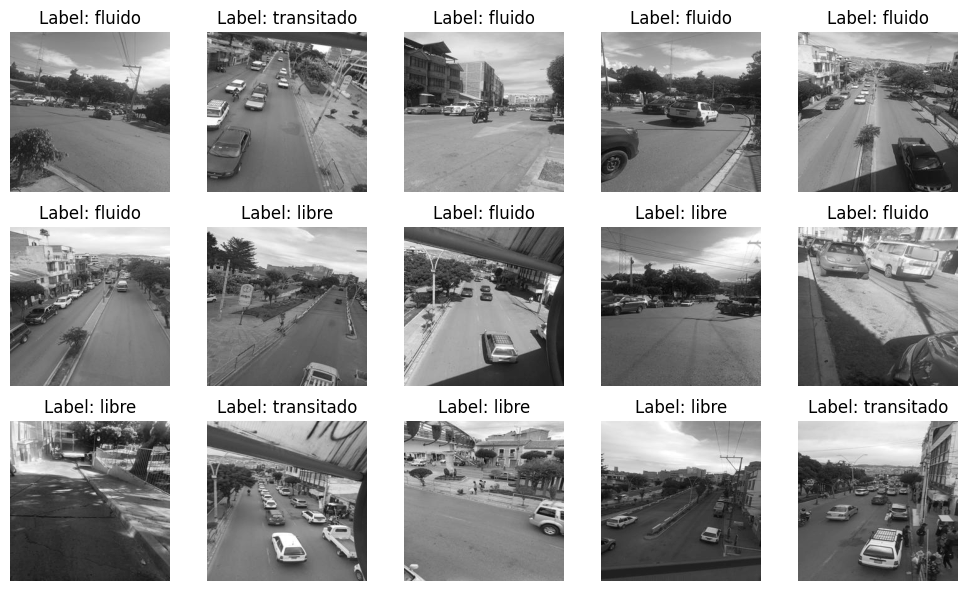

In [ ]:

#aqui se grafica las primeras 15 imagenes del dataset video a que clase pertenesesn 
import matplotlib.pyplot as plt
X = np.array(X)
X_reshaped = X.reshape(-1, 256, 256)  # Ajusta el tamaño a tus imágenes (256x256 en este caso)
fig, axes = plt.subplots(3, 5, figsize=(10, 6))  # Ajusta el número de filas y columnas
axes = axes.ravel()
# Mostrar algunas imágenes
for i in range(15):  # Mostrar las primeras 15 imágenes
    axes[i].imshow(X_reshaped[i], cmap='gray')
    axes[i].set_title(f'Label: {y[i]}')  # Usar índice para acceder a las etiquetas
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#se Combierten las Etiquetas en valores numericos 
from sklearn.preprocessing import LabelEncoder
# Inicializar el codificador
label_encoder = LabelEncoder()
# Ajustar y transformar las etiquetas de texto a números
y = label_encoder.fit_transform(y)
# Verificar que las etiquetas ahora son números
print("Etiquetas convertidas:", y[:10])  #

Etiquetas convertidas: [0 2 0 0 0 0 1 0 1 0]


In [9]:
#dividimos dataset en entrenamiento y prueva y Normalizamos
X_train, X_test, y_train, y_test = X[:1680] / 256., X[1680:] / 256., y[:1680].astype(np.int64), y[1680:].astype(np.int64)

In [ ]:
#SE entrena el modelo ,el perceptrón se inicializa con 65,537 características y 3 salidas. Luego, se entrena durante 100 épocas 
# con una tasa de aprendizaje de 0.003, ajustando los pesos registrando la pérdida cada 3 épocas.
perceptron = Perceptron(65537, 3)
epochs, lr = 100, 0.003
perceptron.fit(X_train, y_train, epochs, lr, log_each=3)


Epoch 3/100 Loss 25.866599651765426
Epoch 6/100 Loss 21.76472204114786
Epoch 9/100 Loss 6.9399885483759
Epoch 12/100 Loss 14.273976990581817
Epoch 15/100 Loss 13.646858413597192
Epoch 18/100 Loss 3.609353719722484
Epoch 21/100 Loss 23.286625320857137
Epoch 24/100 Loss 13.368823579644202
Epoch 27/100 Loss 25.366947956688048
Epoch 30/100 Loss 5.855445727013594
Epoch 33/100 Loss 16.235384544642383
Epoch 36/100 Loss 22.779615718687374
Epoch 39/100 Loss 12.76724763198005
Epoch 42/100 Loss 18.33175958525007
Epoch 45/100 Loss 18.67360841123121
Epoch 48/100 Loss 4.756829560395964
Epoch 51/100 Loss 17.888023152035736
Epoch 54/100 Loss 7.833187794654934
Epoch 57/100 Loss 19.46821017348571
Epoch 60/100 Loss 20.11934911140385
Epoch 63/100 Loss 11.41809201061576
Epoch 66/100 Loss 7.855536115556723
Epoch 69/100 Loss 6.196845155274395
Epoch 72/100 Loss 21.113924891660204
Epoch 75/100 Loss 14.31963695038232
Epoch 78/100 Loss 19.946627318984845
Epoch 81/100 Loss 17.996752755404177
Epoch 84/100 Loss 12.

In [ ]:
#La función evaluate predice las salidas para las entradas x, calcula las probabilidades usando softmax,
#  devuelve la clase con mayor probabilidad para cada muestra usando np.argmax
def evaluate(x):
    y = perceptron.predict(x)
    y_probas = softmax(y)
    return np.argmax(y_probas, axis=1)

In [ ]:
#Evalúa el rendimiento del modelo calculando la proporción de predicciones correctas (y_pred) 
# comparadas con las etiquetas reales (y_test).
from sklearn.metrics import accuracy_score

y_pred = evaluate(X_test)
accuracy_score(y_test, y_pred)

0.5011600928074246

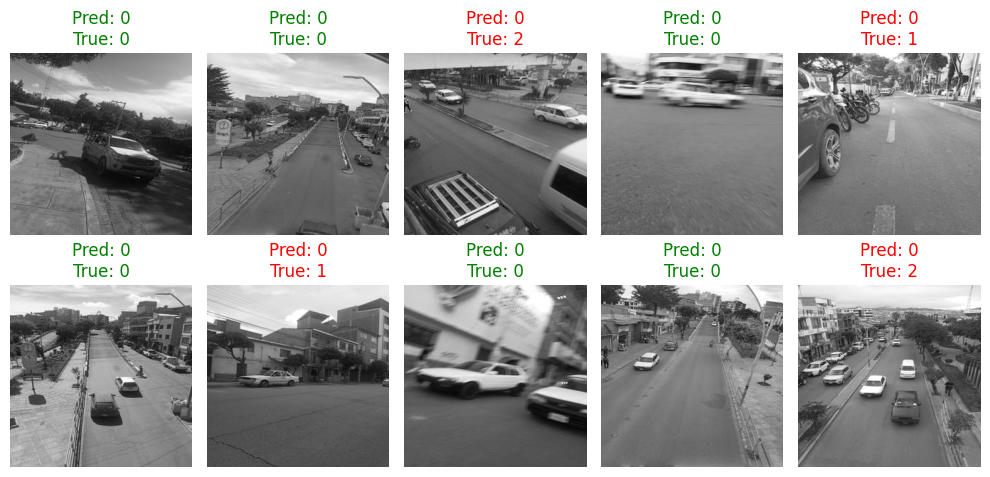

In [ ]:
# Se muestra 10 imágenes de prueba junto con sus predicciones y etiquetas reales, resaltando 
# los títulos en verde si la predicción es correcta o en rojo si es incorrecta, en un gráfico de 2 filas y 5 columnas.
import matplotlib.pyplot as plt
import numpy as np
# Suponiendo que 'evaluate(X_test)' devuelve las predicciones
y_pred = evaluate(X_test)
# Número de imágenes a visualizar
num_images = 10
# Preparamos las imágenes de prueba y las etiquetas reales
images = X_test[:num_images]  # Primeras 10 imágenes de X_test
labels = y_test[:num_images]  # Primeras 10 etiquetas reales
predictions = y_pred[:num_images]  # Primeras 10 predicciones
# Crear el gráfico
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(num_images):
    axes[i].imshow(images[i].reshape(256, 256), cmap='gray')  # Asegúrate de que las imágenes sean de 28x28
    # Si la predicción es correcta, color verde, si no, rojo
    if predictions[i] == labels[i]:
        axes[i].set_title(f"Pred: {predictions[i]}\nTrue: {labels[i]}", color='green')
    else:
        axes[i].set_title(f"Pred: {predictions[i]}\nTrue: {labels[i]}", color='red')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

